<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telco Churn Project
Jamaal Smith 





## Business Case Intro

This analysis will seek to examine whether or not one can predict a customer's decision to remain with a phone company or leave the company. This analysis is important to businesses that must allocate resources to maximize their revenue. Additionally, besides losing paying customers in the near term, companies often have to spend more money to attract new customers than they spend retaining existing customers. 

While there are many factors and data points that can be collected on customers, the primary goal of this analysis is to identify the handful of feature variables that a company can monitor to take preventive measures to mitigate customer churn.

### Additional Context (From Kaggle)

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance


In [63]:
sns.set_context('poster',font_scale=1.4)

## Data Analysis

### First Impressions of Data

In [64]:
#import the data
df = pd.read_csv('churn_data.csv')
from scrubbing import info
#from scrubbing import null
info(df)

The dataframe has a shape of:

 (3333, 21)
The dataframe has the following datatypes:

 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
The total number of each datatype is:


 float64    8
int64      8
object     4
bool       1
dtype: int64


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

### Phone Number & State Column Treatment

### EDA

Text(0.5, 1.0, 'Frequency of Churn')

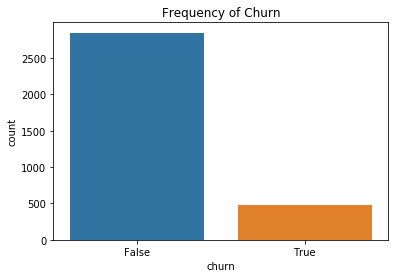

In [14]:
#Frequency of Churn Phenomenon
sns.countplot(x='churn',data=df)
plt.title('Frequency of Churn')

In [15]:
a = (df['churn'].sum())
b = (len(df['churn']))
percent_churn = a/b
percent_remain = 1-percent_churn

print('The percentage of Churn in dataset is:', percent_churn*100)
print('The percentage of remaining in dataset is:', percent_remain*100)

The percentage of Churn in dataset is: 14.491449144914492
The percentage of remaining in dataset is: 85.5085508550855


#### Feature Variable Examination

Because the churn variable is categorical, many visual tools will be limited and not fruitful. As a proxy, comparisons of feature variables against the account length column might be useful. It is worth examining whether certain behaviors by customers result in longer account lengths.

In [16]:
#for visualization below
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

<Figure size 1008x288 with 0 Axes>

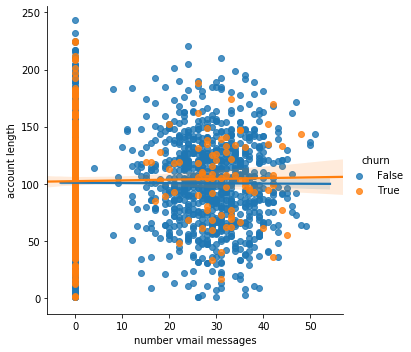

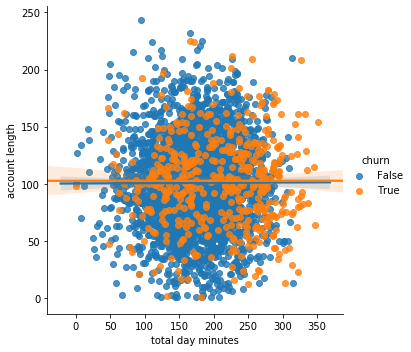

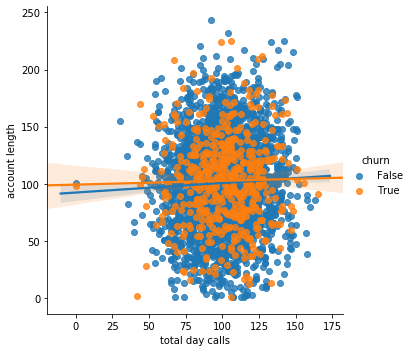

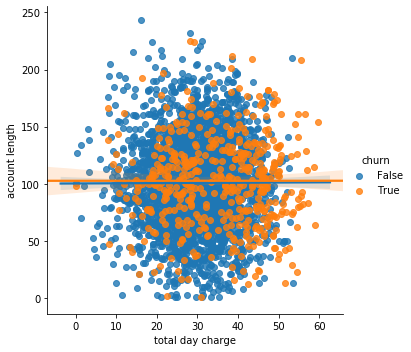

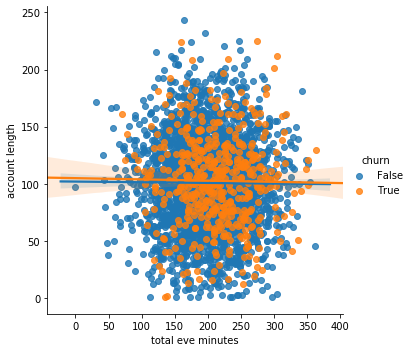

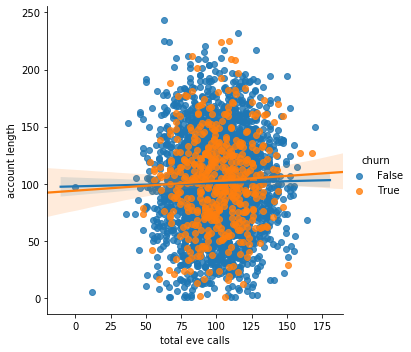

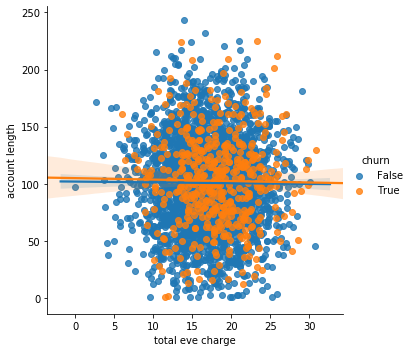

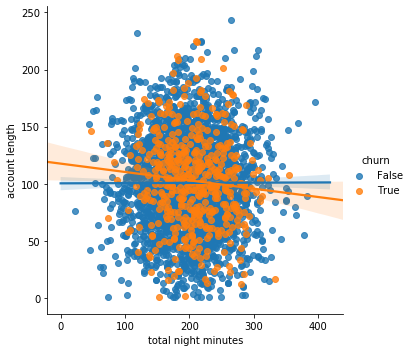

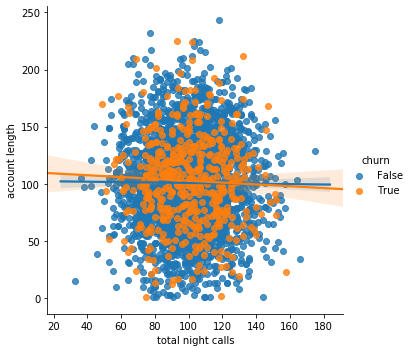

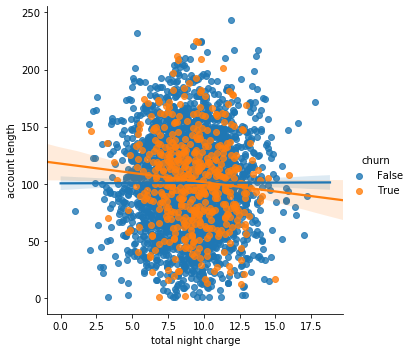

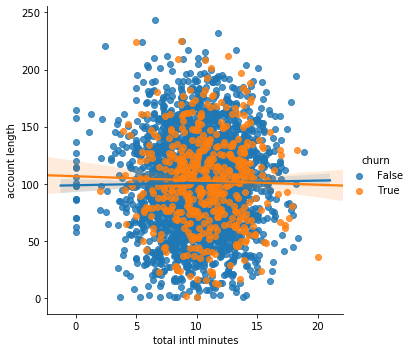

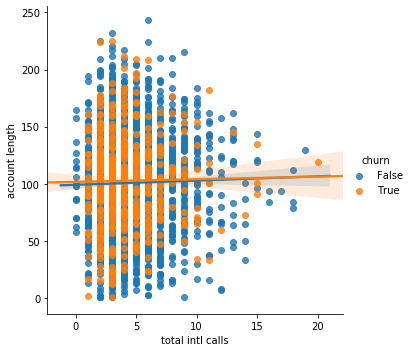

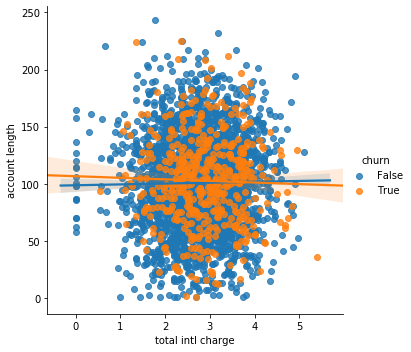

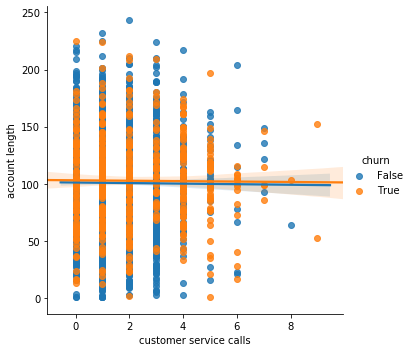

In [17]:
#jointplot with account length as proxy for churn
#fig,ax = plt. subplots()
fig = plt.figure(figsize=(14,4))
features = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls',]
#for i in range(2):
    #for j in range(7):
    
for feature in features:
    ax = sns.lmplot(feature,'account length',data=df,hue='churn')
    plt.show()

                        correlation
number vmail messages     -0.014050
total day minutes         14.795190
total day calls            0.074535
total day charge         -87.004538
total eve minutes        -20.910801
total eve calls            0.036977
total eve charge         245.958743
total night minutes        2.723135
total night calls         -0.025976
total night charge       -60.673414
total intl minutes       -25.959918
total intl calls           0.318870
total intl charge         96.559527
customer service calls    -0.088122


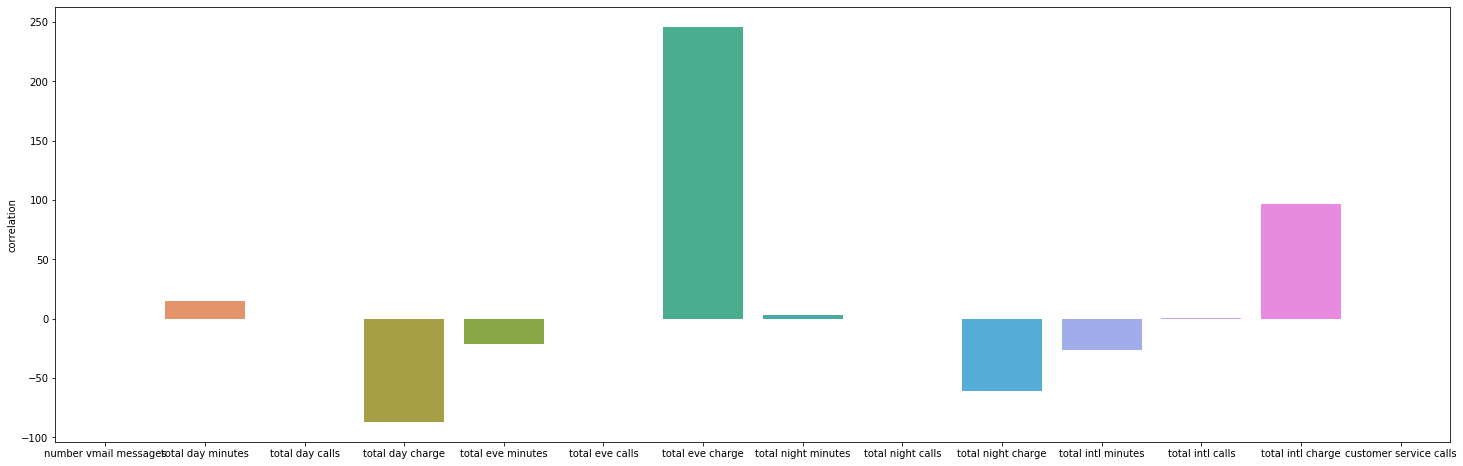

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(df[features],df['account length'])
coef = lr.coef_
df_coef = pd.DataFrame(coef,columns=['correlation'],index=features)
df_coef

plt.figure(figsize=(25,8))
sns.barplot(x=df_coef.index,y=df_coef['correlation'], data=df_coef)

#df_coef.columns = ['Feature','Correlation']
#df_coef.sort_values(by='')
print(df_coef)

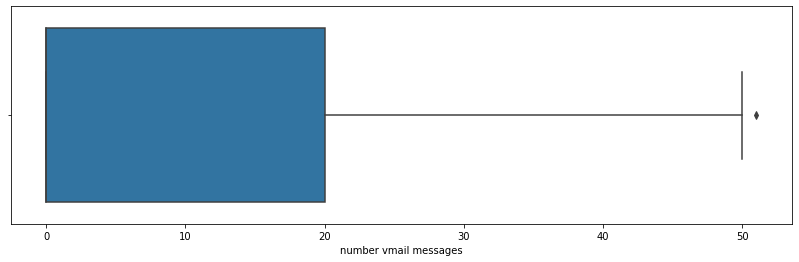

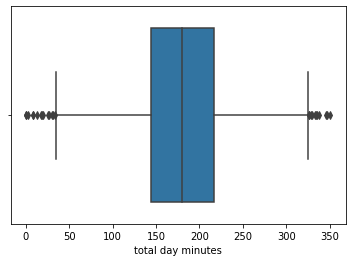

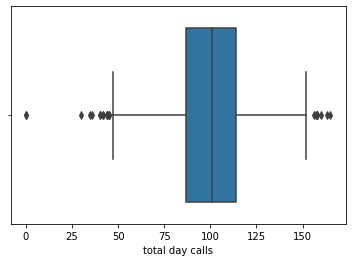

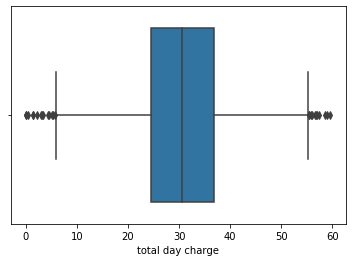

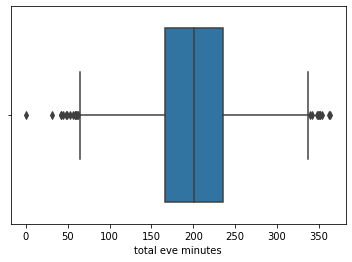

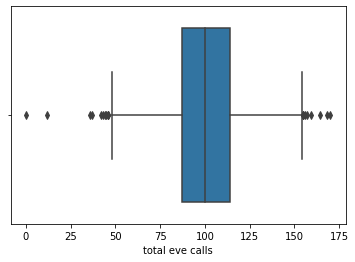

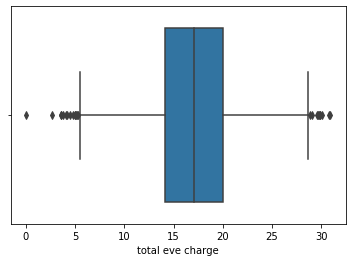

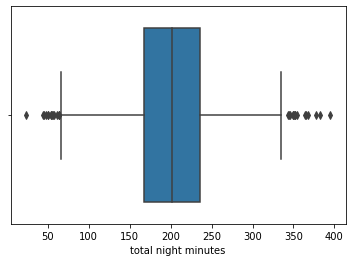

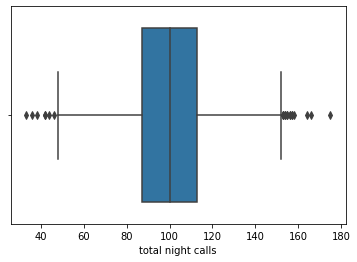

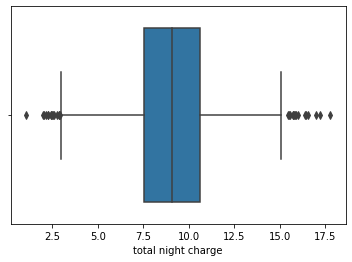

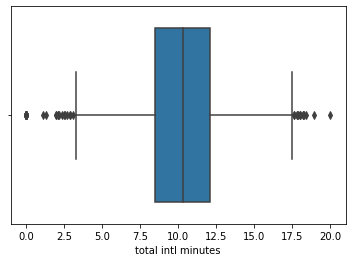

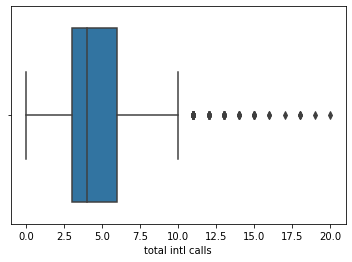

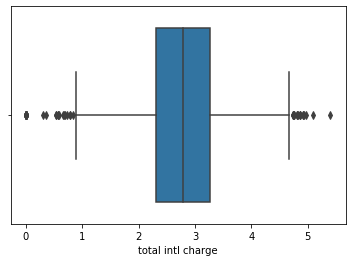

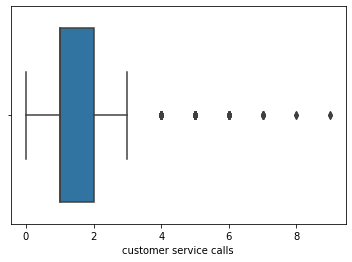

In [19]:
#boxplot with account length as proxy for churn
#fig,ax = plt. subplots()
fig = plt.figure(figsize=(14,4))
features = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls',]
#for i in range(2):
    #for j in range(7):
   
for feature in features:
    ax = sns.boxplot(df[feature],data=df)
    plt.show()

The above visualizations do not show any significant relationships between the selected feature variables and proxy for churn, account length. Based on the human eye, the regression line did seem to be positively sloped for some of the daytime characteristics.

The phone number column can be excluded from the data set. However, when examing churn on a state-by-state basis, there is enough variance in these figures to suggest that state could be a feature variable that might be worth considering for inclusion in the model.

### Analysis of State Feature

In [20]:
#groupby method used to get churn numbers by state
df_state = df.groupby('state',axis=0).sum()
state_churn = df_state['churn']
states = df['state'].unique()
sorted_states = sorted(states)

In [21]:
#import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [22]:
#parameters for graph
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = sorted_states,
            z = df_state['churn'],
            locationmode = 'USA-states',
            text = sorted_states,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Churn amount"}
            ) 

In [23]:
#paramenters for graph
layout = dict(title = 'Churn by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [24]:
choromap = go.Figure(data = [data],layout = layout)

In [25]:
fig = plt.figure(figsize=(20,10))
iplot(choromap)

<Figure size 1440x720 with 0 Axes>

Based on the choropleth map displayed above, the state feature variable is worth keeping in the final analysis.

## Data Preprocessing

### Addressing Categorical Variables

In [26]:
df_encode = df


category = [key for key in dict(df_encode.dtypes) if dict(df_encode.dtypes)[key] in ['bool','object']]

LE = LabelEncoder()
for i in category:
    LE.fit(df[i])
    df_encode[i] = LE.transform(df_encode[i])
df_encode.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Outlier Treatment

In [27]:
#treatment of outliers based on boxplot visualization above
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_encode)
df_encode = transformer.transform(df_encode)
df_encode = pd.DataFrame(df_encode,columns = df.columns)
df_encode.head(5)
print(df_encode.shape)

(3333, 21)


### Assigning Variables

In [28]:
y = df_encode['churn']
X = df_encode.drop(['churn','account length'],axis=1)

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

### Data Split for Cross-Validation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,train_size=.8)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

### Feature Scaling

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = pd.DataFrame(X_test,columns= X.columns)

# Machine Learning Models

## XGBoost Classifier

In [31]:
# train the model

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train,eval_metric=['error','logloss'],eval_set=eval_set)

[0]	validation_0-error:0.089647	validation_0-logloss:0.625497	validation_1-error:0.110945	validation_1-logloss:0.62832
[1]	validation_0-error:0.089647	validation_0-logloss:0.570164	validation_1-error:0.110945	validation_1-logloss:0.575527
[2]	validation_0-error:0.089647	validation_0-logloss:0.524132	validation_1-error:0.110945	validation_1-logloss:0.531871
[3]	validation_0-error:0.089647	validation_0-logloss:0.485496	validation_1-error:0.110945	validation_1-logloss:0.495524
[4]	validation_0-error:0.088897	validation_0-logloss:0.452753	validation_1-error:0.112444	validation_1-logloss:0.465218
[5]	validation_0-error:0.088897	validation_0-logloss:0.422265	validation_1-error:0.112444	validation_1-logloss:0.435256
[6]	validation_0-error:0.085896	validation_0-logloss:0.396207	validation_1-error:0.104948	validation_1-logloss:0.409569
[7]	validation_0-error:0.086272	validation_0-logloss:0.37362	validation_1-error:0.106447	validation_1-logloss:0.387747
[8]	validation_0-error:0.085146	validation

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[16]	validation_0-error:0.048387	validation_0-logloss:0.250152	validation_1-error:0.071964	validation_1-logloss:0.270486
[17]	validation_0-error:0.048387	validation_0-logloss:0.243208	validation_1-error:0.070465	validation_1-logloss:0.264462
[18]	validation_0-error:0.044261	validation_0-logloss:0.234704	validation_1-error:0.073463	validation_1-logloss:0.257025
[19]	validation_0-error:0.046512	validation_0-logloss:0.229159	validation_1-error:0.068966	validation_1-logloss:0.251487
[20]	validation_0-error:0.043886	validation_0-logloss:0.224245	validation_1-error:0.070465	validation_1-logloss:0.247371
[21]	validation_0-error:0.041635	validation_0-logloss:0.217515	validation_1-error:0.068966	validation_1-logloss:0.241756
[22]	validation_0-error:0.042386	validation_0-logloss:0.21186	validation_1-error:0.070465	validation_1-logloss:0.236572
[23]	validation_0-error:0.042386	validation_0-logloss:0.208056	validation_1-error:0.070465	validation_1-logloss:0.232692
[24]	validation_0-error:0.042386	

[84]	validation_0-error:0.031508	validation_0-logloss:0.135427	validation_1-error:0.052474	validation_1-logloss:0.179351
[85]	validation_0-error:0.031133	validation_0-logloss:0.134948	validation_1-error:0.052474	validation_1-logloss:0.179453
[86]	validation_0-error:0.031508	validation_0-logloss:0.134477	validation_1-error:0.050975	validation_1-logloss:0.179535
[87]	validation_0-error:0.031883	validation_0-logloss:0.133602	validation_1-error:0.052474	validation_1-logloss:0.179482
[88]	validation_0-error:0.032258	validation_0-logloss:0.132978	validation_1-error:0.052474	validation_1-logloss:0.179621
[89]	validation_0-error:0.031508	validation_0-logloss:0.132714	validation_1-error:0.052474	validation_1-logloss:0.179279
[90]	validation_0-error:0.030758	validation_0-logloss:0.13195	validation_1-error:0.052474	validation_1-logloss:0.179213
[91]	validation_0-error:0.030383	validation_0-logloss:0.131235	validation_1-error:0.050975	validation_1-logloss:0.178456
[92]	validation_0-error:0.030758	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
#predict
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print( "The model's accuracy is",accuracy)

The model's accuracy is 0.9490254872563718


In [33]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.95      0.97       595\n         1.0       0.70      0.92      0.80        72\n\n    accuracy                           0.95       667\n   macro avg       0.85      0.93      0.88       667\nweighted avg       0.96      0.95      0.95       667\n'

The Accuracy Score for this model is 0.9490254872563718


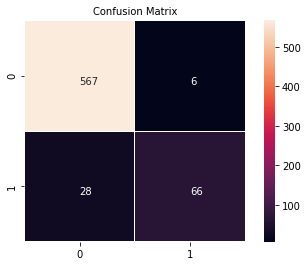

In [34]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print('The Accuracy Score for this model is {acc}'.format(acc=acc))
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 10)
plt.tight_layout()
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm, annot=True,annot_kws=annot_kws, fmt="d", linewidths=.2, square = True,); 


#ax = sns.heatmap(data, annot=True, annot_kws= annot_kws)

Accuracy: 94.90%


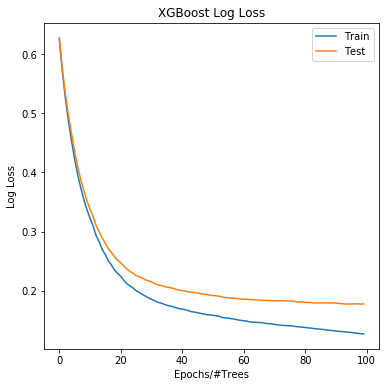

In [35]:
# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs/#Trees')
pyplot.title('XGBoost Log Loss')
pyplot.show()

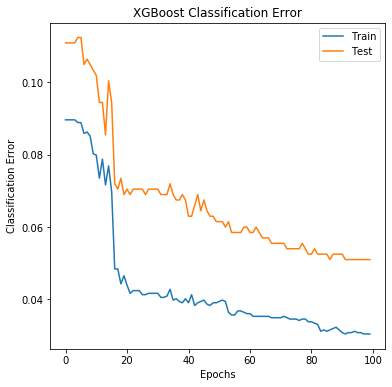

In [36]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Classification Error')
pyplot.show()

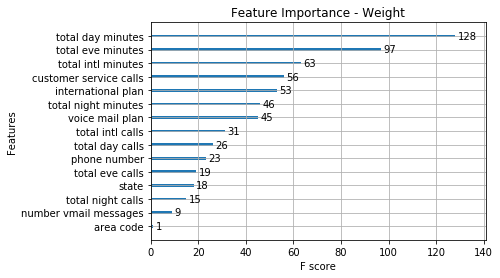

In [37]:
#feature importance - weight
plot_importance(model,max_num_features=20)
plt.title("Feature Importance - Weight")
plt.show()

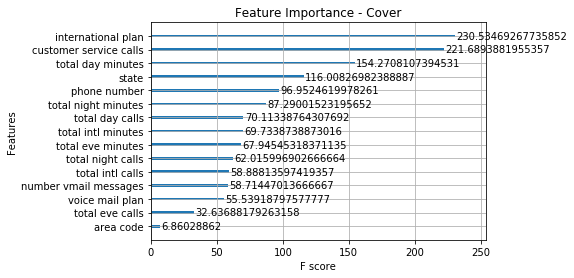

In [38]:
#feature importance - cover
plot_importance(model,max_num_features=20,importance_type='cover')
plt.title("Feature Importance - Cover")
plt.show()

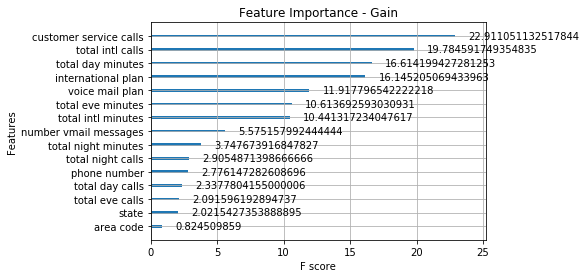

In [39]:
#feature importance - gain
plot_importance(model,max_num_features=20,importance_type='gain')
plt.title("Feature Importance - Gain")
plt.show()

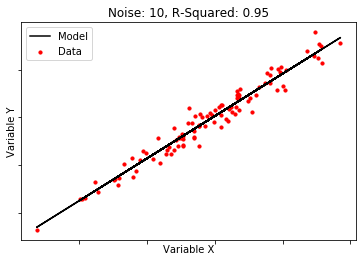

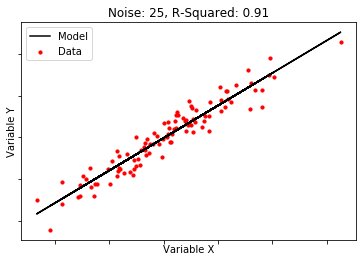

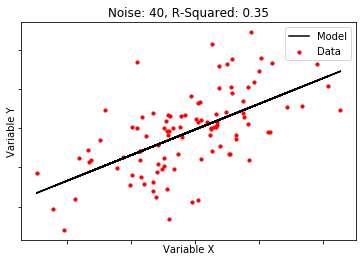

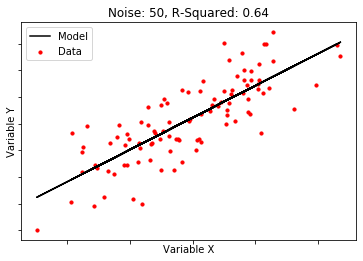

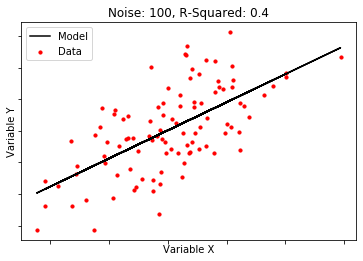

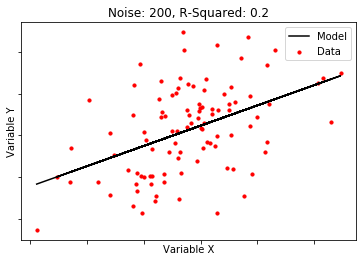

Optimal Alpha Value: 0


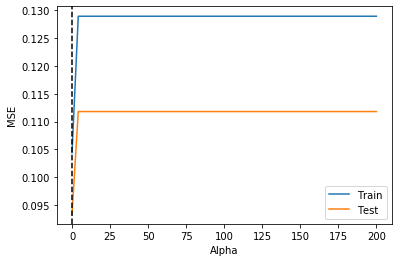

In [40]:
from regression import preprocess
from regression import optimal_alpha
optimal_alpha(X_train,y_train)

The Accuracy Score for this model is 0.9490254872563718


Text(0.5, 1, 'Confusion Matrix')

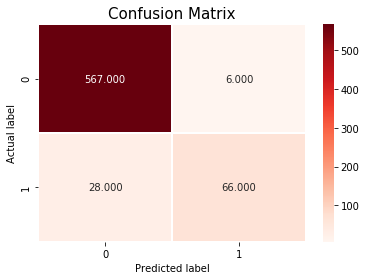

In [41]:
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.text(verticalalignment='center')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

In [42]:
# Feature Selection with SelectFromModel

from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)


output_dict = {}

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=0.10, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
     

Thresh=0.000, n=4, Accuracy: 89.51%
Thresh=0.000, n=4, Accuracy: 89.51%
Thresh=0.000, n=4, Accuracy: 89.51%
Thresh=0.000, n=4, Accuracy: 89.51%
Thresh=0.006, n=4, Accuracy: 89.51%
Thresh=0.015, n=4, Accuracy: 89.51%
Thresh=0.016, n=4, Accuracy: 89.51%
Thresh=0.018, n=4, Accuracy: 89.51%
Thresh=0.021, n=4, Accuracy: 89.51%
Thresh=0.022, n=4, Accuracy: 89.51%
Thresh=0.029, n=4, Accuracy: 89.51%
Thresh=0.043, n=4, Accuracy: 89.51%
Thresh=0.080, n=4, Accuracy: 89.51%
Thresh=0.081, n=4, Accuracy: 89.51%
Thresh=0.091, n=4, Accuracy: 89.51%
Thresh=0.124, n=4, Accuracy: 89.51%
Thresh=0.127, n=4, Accuracy: 89.51%
Thresh=0.151, n=4, Accuracy: 89.51%
Thresh=0.175, n=4, Accuracy: 89.51%


## XGBoost with Feature Selection

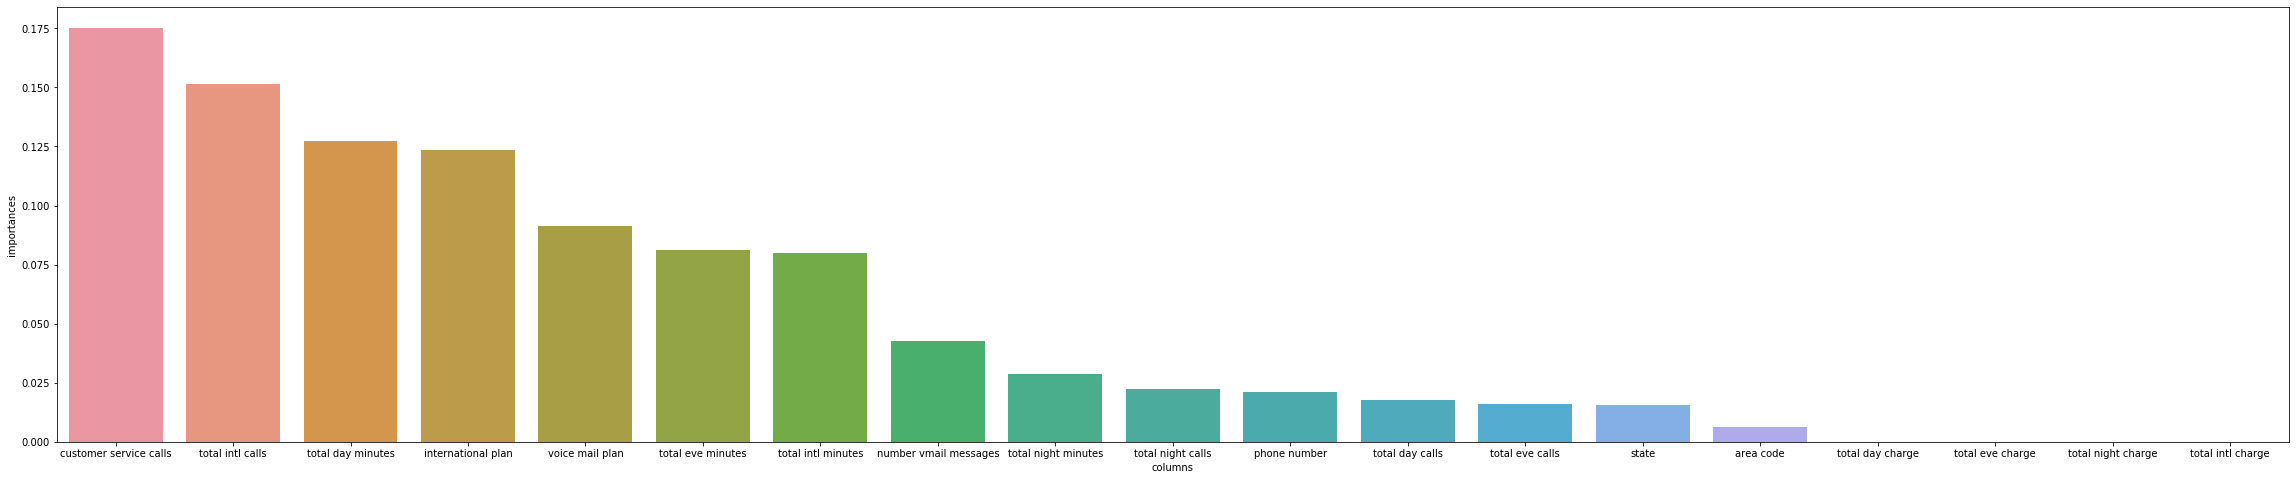

In [43]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

plt.figure(figsize=(40,8))
plt.tight_layout()
sns.barplot(x=results['columns'],y=results['importances'], data=results)


In [44]:
df_encode.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [45]:
#selecting top features based on importance
X_new = df_encode[['international plan','customer service calls','total day minutes','voice mail plan']]
y_new = df_encode['churn']

In [46]:
#data split
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new)

In [47]:
# train the model

model_new = XGBClassifier()
eval_set = [(X_train_new, y_train_new), (X_test_new, y_test_new)]
model_new.fit(X_train_new,y_train_new,eval_metric=['error','logloss'],eval_set=eval_set)

[0]	validation_0-error:0.097239	validation_0-logloss:0.62805	validation_1-error:0.097122	validation_1-logloss:0.627209
[1]	validation_0-error:0.097239	validation_0-logloss:0.574498	validation_1-error:0.097122	validation_1-logloss:0.572948
[2]	validation_0-error:0.097239	validation_0-logloss:0.530016	validation_1-error:0.098321	validation_1-logloss:0.527606
[3]	validation_0-error:0.097239	validation_0-logloss:0.491608	validation_1-error:0.098321	validation_1-logloss:0.489439
[4]	validation_0-error:0.097239	validation_0-logloss:0.459042	validation_1-error:0.098321	validation_1-logloss:0.456946
[5]	validation_0-error:0.097239	validation_0-logloss:0.43077	validation_1-error:0.098321	validation_1-logloss:0.429084
[6]	validation_0-error:0.097239	validation_0-logloss:0.406474	validation_1-error:0.098321	validation_1-logloss:0.405029
[7]	validation_0-error:0.097639	validation_0-logloss:0.38553	validation_1-error:0.098321	validation_1-logloss:0.384359
[8]	validation_0-error:0.097639	validation_

[69]	validation_0-error:0.092437	validation_0-logloss:0.230067	validation_1-error:0.094724	validation_1-logloss:0.252784
[70]	validation_0-error:0.092437	validation_0-logloss:0.229863	validation_1-error:0.094724	validation_1-logloss:0.252831
[71]	validation_0-error:0.092437	validation_0-logloss:0.229709	validation_1-error:0.094724	validation_1-logloss:0.253112
[72]	validation_0-error:0.092437	validation_0-logloss:0.229568	validation_1-error:0.094724	validation_1-logloss:0.253314
[73]	validation_0-error:0.092437	validation_0-logloss:0.229141	validation_1-error:0.095923	validation_1-logloss:0.253353
[74]	validation_0-error:0.092437	validation_0-logloss:0.229033	validation_1-error:0.095923	validation_1-logloss:0.253417
[75]	validation_0-error:0.092437	validation_0-logloss:0.228589	validation_1-error:0.095923	validation_1-logloss:0.253201
[76]	validation_0-error:0.092437	validation_0-logloss:0.228452	validation_1-error:0.095923	validation_1-logloss:0.253454
[77]	validation_0-error:0.092037

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy: 90.05%


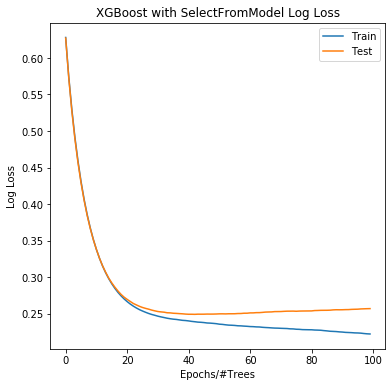

In [48]:
# make predictions for test data
y_pred_new = model_new.predict(X_test_new)
predictions = [round(value) for value in y_pred_new]

# evaluate predictions
accuracy = accuracy_score(y_test_new, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# retrieve performance metrics
results_new = model_new.evals_result()
epochs = len(results_new['validation_0']['error'])
x_axis = range(0, epochs)

from matplotlib import pyplot
# plot log loss
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results_new['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results_new['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs/#Trees')
pyplot.title('XGBoost with SelectFromModel Log Loss')
pyplot.show()

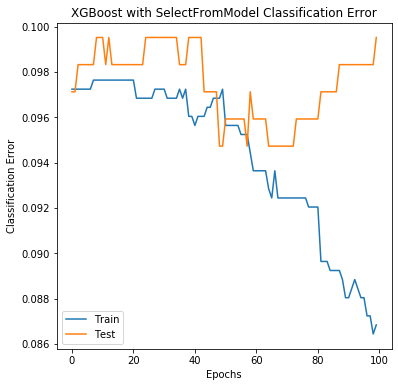

In [49]:
# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results_new['validation_0']['error'], label='Train')
ax.plot(x_axis, results_new['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost with SelectFromModel Classification Error')
pyplot.show()

The Accuracy Score for this model is 0.9004796163069544


Text(0.5, 1, 'Confusion Matrix')

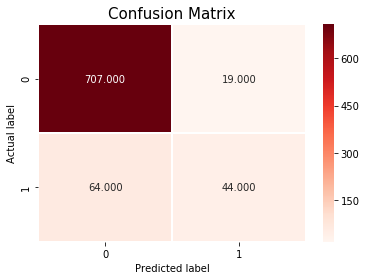

In [50]:
cm = confusion_matrix(y_test_new,y_pred_new)
acc = accuracy_score(y_test_new,y_pred_new)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.text(verticalalignment='center')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

## Logistic Model

In [51]:
#Logistic Model with GridCV to find best parameters for model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {'class_weight' : ['balanced', None], 
              'penalty' : ['l2','l1'], 
              'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['saga','liblinear']}
grid = GridSearchCV(estimator = lr, cv=5, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    3.7s


Best Score:0.8217547735690428
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   28.9s finished


In [52]:
#predictions
lr = LogisticRegression(**best_parameters)
lr.fit(X_train,y_train)
y_pred_log = lr.predict(X_test)
accuracy_score(y_test,y_pred_log)

0.7721139430284858

The Accuracy Score for this model is 0.7721139430284858


Text(0.5, 1, 'Confusion Matrix')

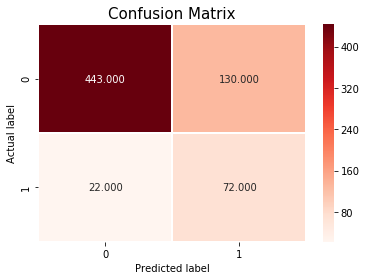

In [53]:
#confusion matrix visualization
cm = confusion_matrix(y_test,y_pred_log)
acc = accuracy_score(y_test,y_pred_log)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.text(verticalalignment='center')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

In [54]:
#getting feature names after RFE
from sklearn.feature_selection import RFE
cols = list(X_train.columns)
selector = RFE(lr,4)
X_rfe = selector.fit(X_train,y_train)

features = pd.Series(selector.support_,index = cols)
selected_features_rfe = features[features==True].index

X_log_select = df_encode[selected_features_rfe]
print(selected_features_rfe)

Index(['international plan', 'voice mail plan', 'total day charge',
       'customer service calls'],
      dtype='object')


In [55]:
#splitting data
X_train_log_select, X_test_log_select, y_train_log_select, y_test_log_select = train_test_split(X_log_select,y)


In [56]:
#train model
lr.fit(X_train_log_select,y_train_log_select)

#prediction
y_pred_log_select = lr.predict(X_test_log_select)

The Accuracy Score for this model is 0.7398081534772182


Text(0.5, 1, 'Confusion Matrix')

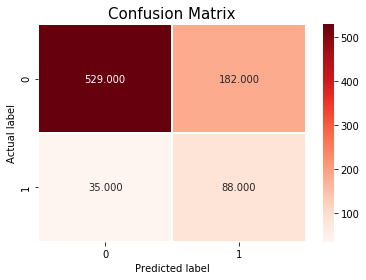

In [57]:
#confusion matrix visualization
cm = confusion_matrix(y_test_log_select,y_pred_log_select)
acc = accuracy_score(y_test_log_select,y_pred_log_select)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.text(verticalalignment='center')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

## Recommendation

As the feature selection algorithm highlighted, the four key feature variables that the telephone company must monitor are: international plan, voicemail plan, total day minutes and customer service calls.

The company should examine states with the highest level of churn to understand whether their churn is the result of other market forces such as rampant competition or whether these states might not have the same infrastructure investment as sttes with lower churn levels.

